# <font color = red>  Este projeto consiste na criação de nuvens de palavras, que irão demonstrar algumas informações sobre o nível de insatisfação do cliente, relacionando diferentes atributos contidos na base de dados.

<dir>
<img src='img.png' width = '700', leight = '700'>
<dir>

In [1]:
'''Importando bibliotecas.'''

import nltk
import pandas as pd
import os
import numpy as np
from PIL import Image
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""Carregando o banco de dados para saber o contexto dos dados e realizar
as inferências necessárias para obter os resultados."""

data = pd.read_csv('base reclamações.csv',encoding='windows-1252', sep =';')
data.tail(1)

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
42306,Sudeste,SP,ESAB ESCOLA SUPERIOR ABERTA DO BRASIL LTDA,NaN,EDUCAÇÃO SUPERIOR - GRADUAÇÃO E PÓS-GRADUAÇÃO,"Escola ( Pré, 1º, 2º Graus e Superior )",Serviço não fornecido (entrega/instalação/não ...,entre 31 a 40 anos


In [3]:
data [['Região', 'Estado', 'Empresa', 'Subsidiária', 'Setor', 'Serviço',
       'Problema', 'Faixa Etária']] = data[['Regiao ', 'estado', 'empresa', 'subsidiaria  ', 'area ', 'serviço',
       'problema', 'faixa etarea']]

In [4]:
data = data.drop(columns= {'Regiao ', 'estado', 'empresa', 'subsidiaria  ', 'area ', 'serviço',
       'problema', 'faixa etarea'})
data.head(1)

,Região,Estado,Empresa,Subsidiária,Setor,Serviço,Problema,Faixa Etária
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos


### Gere um relatório geral para avaliar o banco de dados e considerar possíveis inferências.

In [ ]:
"""Sempre use pandas-profiling na colaboração, se ocorrer um erro no
jupyterm, uma boa prática é tentar executar o código na colaboração e verificar
se será realizado."""

from pandas_profiling import ProfileReport
profile = ProfileReport(data, title='Reclamações 2017')
profile

In [ ]:
profile.to_file('Reclamações_2017')

### Verificar os valores únicos de alguns atributos necessários para o estudo.

In [5]:
'''Verificando os valores exclusivos da coluna Estado.'''

uniq_estado = data['Estado'].values
np.unique(uniq_estado)

array(['CE', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'RN', 'RO', 'RS', 'SC', 'SP', 'TO'], dtype=object)

In [7]:
'''Verificar os valores únicos das colunas.'''

uniq_faixa = data['Faixa Etária'].values
np.unique(uniq_faixa)

array(['Nao Informada', 'até 20 anos', 'entre 21 a 30 anos',
       'entre 31 a 40 anos', 'entre 41 a 50 anos', 'entre 51 a 60 anos',
       'entre 61 a 70 anos', 'mais de 70 anos'], dtype=object)

# <font color = red>  Quais são os ESTADOS com maior incidência de insatisfação (reclamações) em relação aos serviços realizados por empresas de diferentes setores.

### Understanding the state column.

In [8]:
"""Modificando as siglas da coluna de status para os respectivos nomes."""

replace_values = {
    'CE': 'Ceará',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia',
    'SC': 'Santa Catarina',
    'SP': 'São Paulo',
    'TO': 'Tocantins'
}

data = data.replace({'Estado':replace_values})

In [9]:
"""Verificar quais são os NOVOS valores categóricos exclusivos na coluna de status DataFrame."""

uniq_est = data['Estado'].values

np.unique(uniq_est)

array(['Ceará', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso',
       'Mato Grosso do Sul', 'Minas Gerais', 'Paraíba', 'Pará',
       'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Rio Grande do Sul',
       'Rondônia', 'Santa Catarina', 'São Paulo', 'Tocantins'],
      dtype=object)

### Tratamento da coluna estado para se adequar ao código de construção da nuvem.

In [10]:
"""Separação da coluna estado do DataFrame para que possa se criar a nuvem com este objeto."""

df_estado = pd.DataFrame()
df_estado['Estado'] = data['Estado']

In [11]:
# Observar como irão ficar os nomes dos estados na criação da cloud

dicionario = {'/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_estado["Estado"] = df_estado.replace({'Estado': dicionario},regex=True)

### Apreciação inicial do que foi obtido

In [12]:
X =(df_estado.groupby("Estado").size().sort_values(ascending=False))
X

Estado
São Paulo              8127
Goiás                  7764
Mato Grosso do Sul     4723
Rio Grande do Norte    4073
Mato Grosso            3972
Minas Gerais           3460
Piauí                  2153
Rondônia               2057
Santa Catarina         1955
Ceará                  1766
Espírito Santo          828
Tocantins               567
Pará                    341
Paraíba                 302
Maranhão                126
Rio Grande do Sul        90
Pernambuco                3
dtype: int64

### Geração do wordcloud com os estados e a ocorrências de reclamações

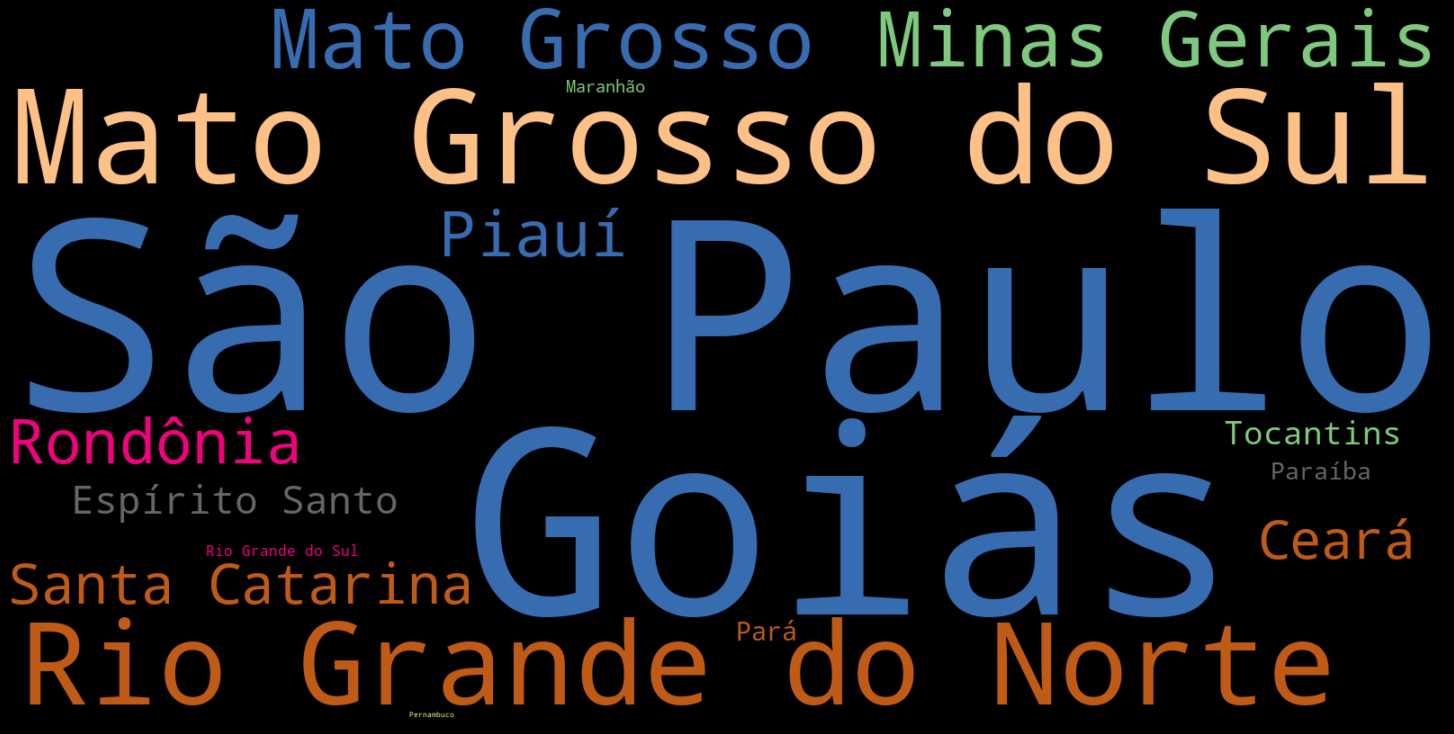

In [13]:
wordcloud_empresas = WordCloud(background_color="black",collocations=False,
                              colormap="Accent",
                              width = 1600,
                              height = 800,
                              max_font_size=1000,
                              max_words=17,
                             ).generate_from_frequencies(X)
plt.figure(figsize = (20,10),
           facecolor = 'k',
           edgecolor = 'g')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Estado_wordcloud.png")
plt.show()

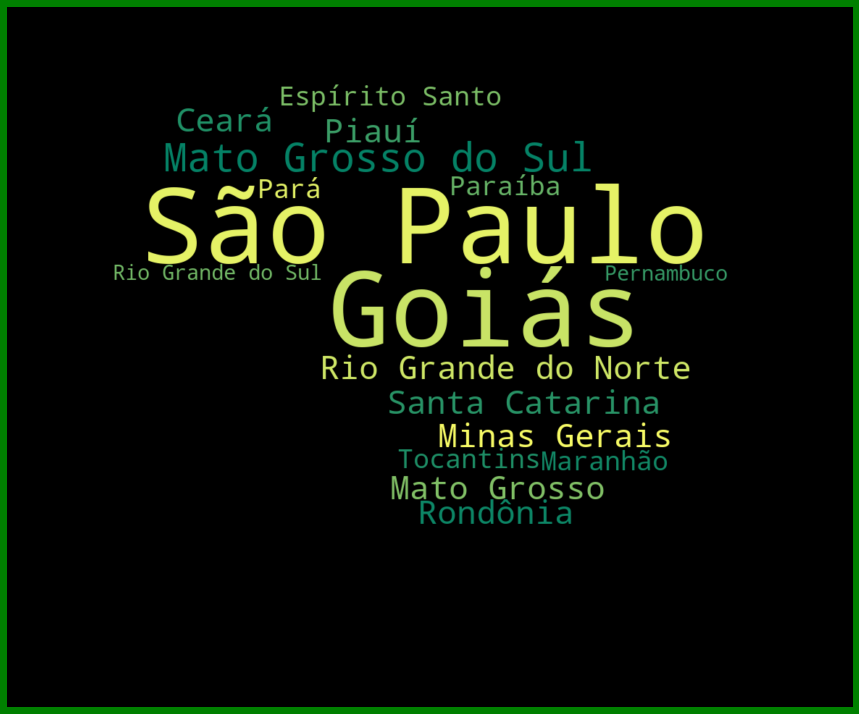

In [14]:
# endereço LOCAL da SUA imagem
rio_mask = np.array(Image.open("Brasil.jpg"))

wordcloud_empresas = WordCloud(background_color="Black",collocations=False,
                               colormap="summer",
                              width = 1600,max_words=17,relative_scaling=0,
                              height = 800,max_font_size=1000,min_font_size=1,
                              mask=rio_mask
                             ).generate_from_frequencies(X)

plt.figure(figsize = (20,10),
           facecolor='g',
           edgecolor = 'r')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=1)
plt.savefig("Estado_wordcloud.png")
plt.show()

### Criação de visualizações indicando a quantidade decrescente de problemas por estado. 

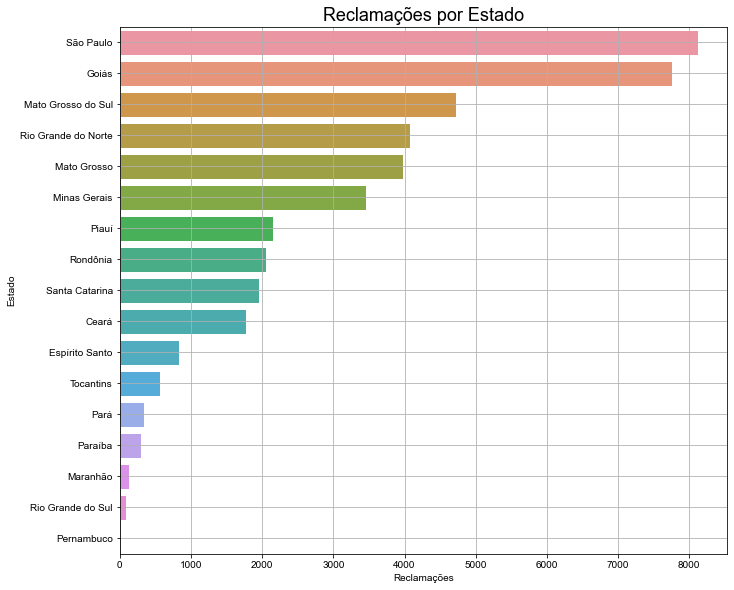

In [15]:
# Inicializa a figura do matplotlib
f, ax = plt.subplots(figsize=(10,8))

# Inicializa estilo do seaborn
sns.set(style="ticks",font_scale=1.5)

# carrega o dataset
sns.countplot(y = data["Estado"], data=df_estado,
              order = df_estado["Estado"].value_counts().index[:17])
ax.grid(True)
ax.set_title("Reclamações por Estado")
ax.set_ylabel('Estado')
ax.set_xlabel('Reclamações')
plt.tight_layout(pad=0)
plt.savefig("Problema_barplot.png")
plt.show()

### Criando uma nova nuvem de palavras indicando quais são os serviços que geram mais reclamações no estado de SÃO PAULO, que de acordo com a análise foi entendido como o campão em reclamações. 

In [22]:
SP = data[data['Estado']=='São Paulo']
SP.tail(1)

,Região,Estado,Empresa,Subsidiária,Setor,Serviço,Problema,Faixa Etária
42306,Sudeste,São Paulo,ESAB ESCOLA SUPERIOR ABERTA DO BRASIL LTDA,NaN,EDUCAÇÃO SUPERIOR - GRADUAÇÃO E PÓS-GRADUAÇÃO,"Escola ( Pré, 1º, 2º Graus e Superior )",Serviço não fornecido (entrega/instalação/não ...,entre 31 a 40 anos


In [23]:
len(SP)

8127

In [24]:
df_serviço_SP = pd.DataFrame()
df_serviço_SP['Serviço'] = SP['Serviço']

In [26]:
dicionario = {' ':' ','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_serviço_SP["Serviço"] = df_serviço_SP.replace({'Serviço': dicionario},regex=True)

In [27]:
XXX_SP = (df_serviço_SP.groupby("Serviço").size().sort_values(ascending=False))
XXX_SP

Serviço
Telefonia Fixa  Plano de Expansão  Compra e Venda  Locação     1310
Telefonia Celular                                               949
Energia Elétrica                                                549
Telefone  Convencional Celular Interfone Etc                    524
Banco comercial                                                 361
                                                               ... 
Farmácia  Drogaria                                                1
Prestadora de Serviço de Reabilitação de Nome                     1
Bares Docerias Chopperias Casas Noturnas e Afins                  1
Carpete  Tapete  Nylon Madeira                                    1
Artigo Para Festa  Bexiga Máscara Enfeites Fogos Balão Etc        1
Length: 157, dtype: int64

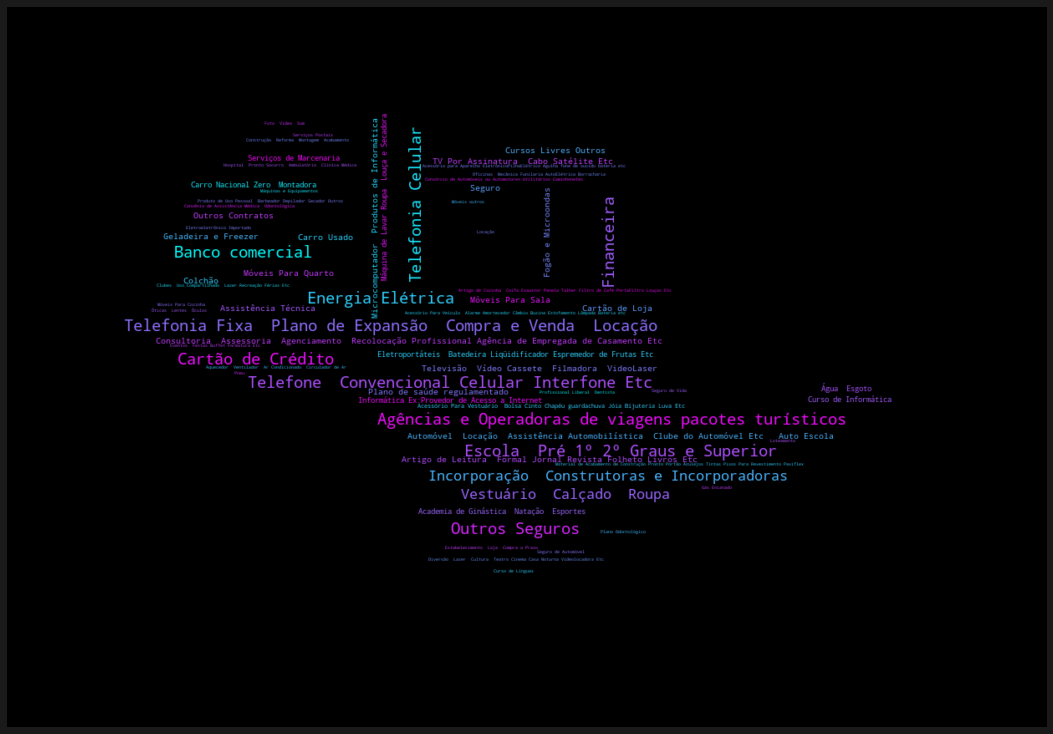

In [28]:
estado_mask = np.array(Image.open("SP.jpg"))

wordcloud_empresas = WordCloud(background_color="black",collocations=False,
                              colormap="cool",
                              width = 1600,
                              height = 800,
                              max_font_size=1000,min_font_size=1,
                              max_words=70,relative_scaling=0,
                             mask=estado_mask).generate_from_frequencies(XXX_SP)
plt.figure(figsize = (20,10),
           facecolor = 'k',
           edgecolor = 'r')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("São Paulo_wordcloud.png")
plt.show()

<ipython-input-29-9d6a03bb0fec>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(pad=0)


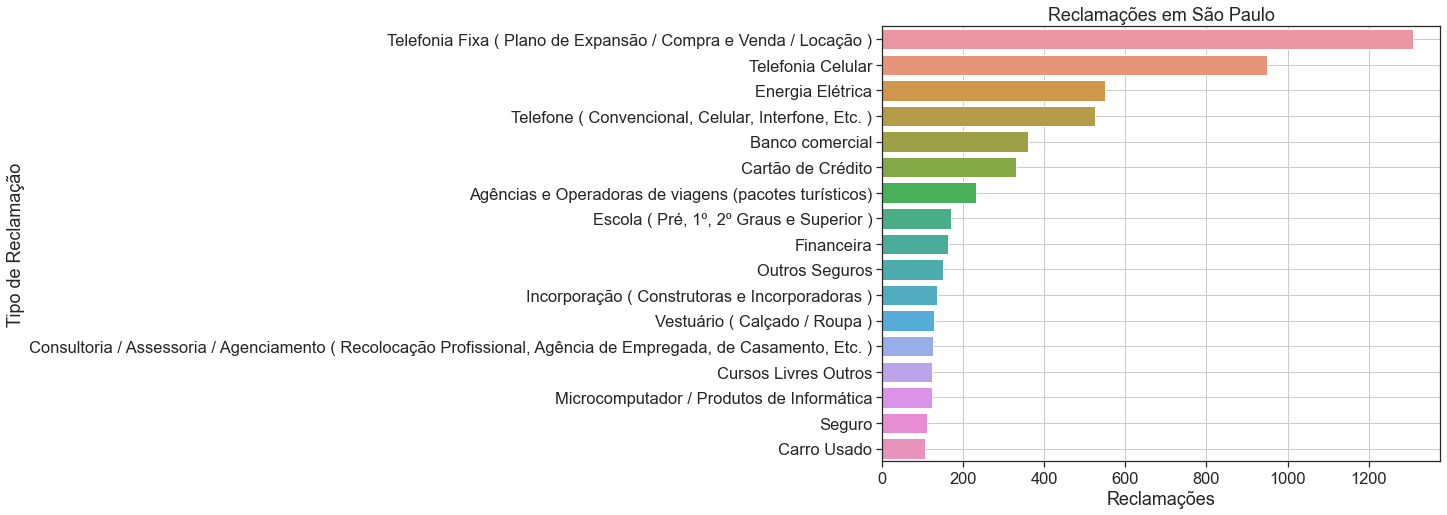

In [29]:
# Inicializa a figura do matplotlib
f, ax = plt.subplots(figsize=(10,8))

# Inicializa estilo do seaborn
sns.set(style="ticks",font_scale=1.5)

# carrega o dataset
sns.countplot(y = SP["Serviço"], data=SP,
              order = SP["Serviço"].value_counts().index[:17])
ax.grid(True)
ax.set_title("Reclamações em São Paulo")
ax.set_ylabel('Tipo de Reclamação')
ax.set_xlabel('Reclamações')
plt.tight_layout(pad=0)
plt.savefig("Problema(São Paulo)_barplot.png")
plt.show()

# <font color = red> Quais são os tipos de SERVIÇO com maior incidência de insatisfação (reclamações) a nível nacional.

In [30]:
df_serviço = pd.DataFrame()
df_serviço['Serviço'] = data['Serviço']

In [31]:
df_serviço.isnull().sum()

Serviço    0
dtype: int64

In [32]:
'''Criação de um dicionário com as substituições necessárias à construção da nuvem.'''

dicionario = {'/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_serviço['Serviço'] = df_serviço.replace({'Serviço': dicionario},regex=True)

In [33]:
XX = (df_serviço.groupby("Serviço").size().sort_values(ascending=False))
XX

Serviço
Telefone  Convencional Celular Interfone Etc                   5149
Telefonia Celular                                              3037
Telefonia Fixa  Plano de Expansão  Compra e Venda  Locação     2713
Banco comercial                                                2313
Cartão de Crédito                                              2274
                                                               ... 
Charutaria  Cigarro Tabaco Cachimbo Etc                           1
Embalagem                                                         1
Farináceos fubá polvilho etc                                      1
Profissional Liberal  Veterinário                                 1
Radiochamada  Pager                                               1
Length: 193, dtype: int64

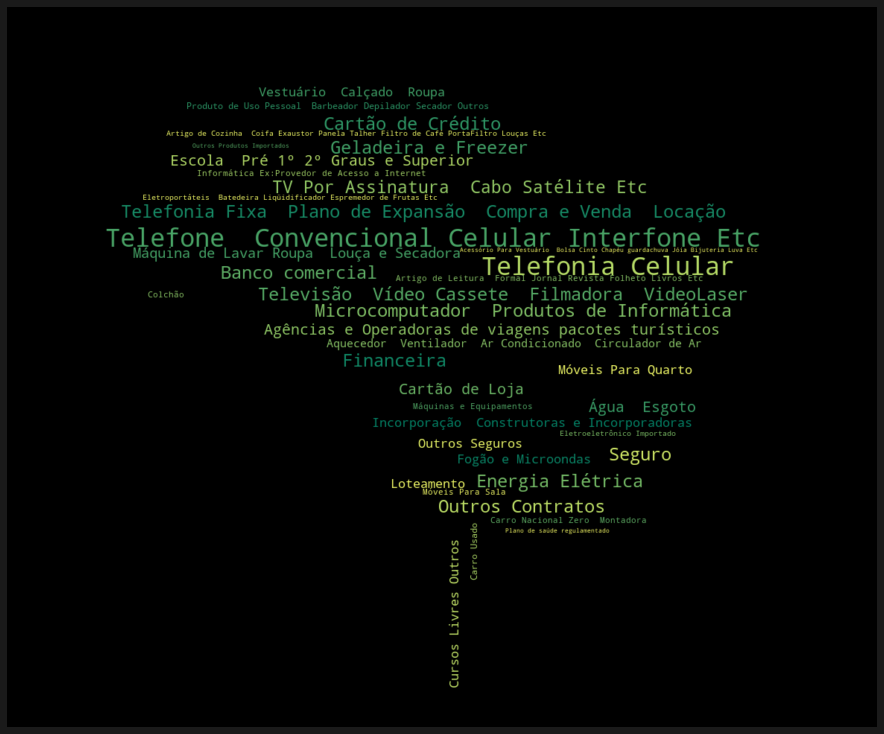

In [34]:
estado_mask = np.array(Image.open("Brasil.jpg"))

wordcloud_empresas = WordCloud(background_color="black",collocations=False,
                              colormap="summer",
                              width = 1600,
                              height = 800,
                              max_font_size=1000,min_font_size=1,
                              max_words=40,relative_scaling=0,
                             mask=estado_mask).generate_from_frequencies(XX)
plt.figure(figsize = (20,10),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Serviço_wordcloud.png")
plt.show()

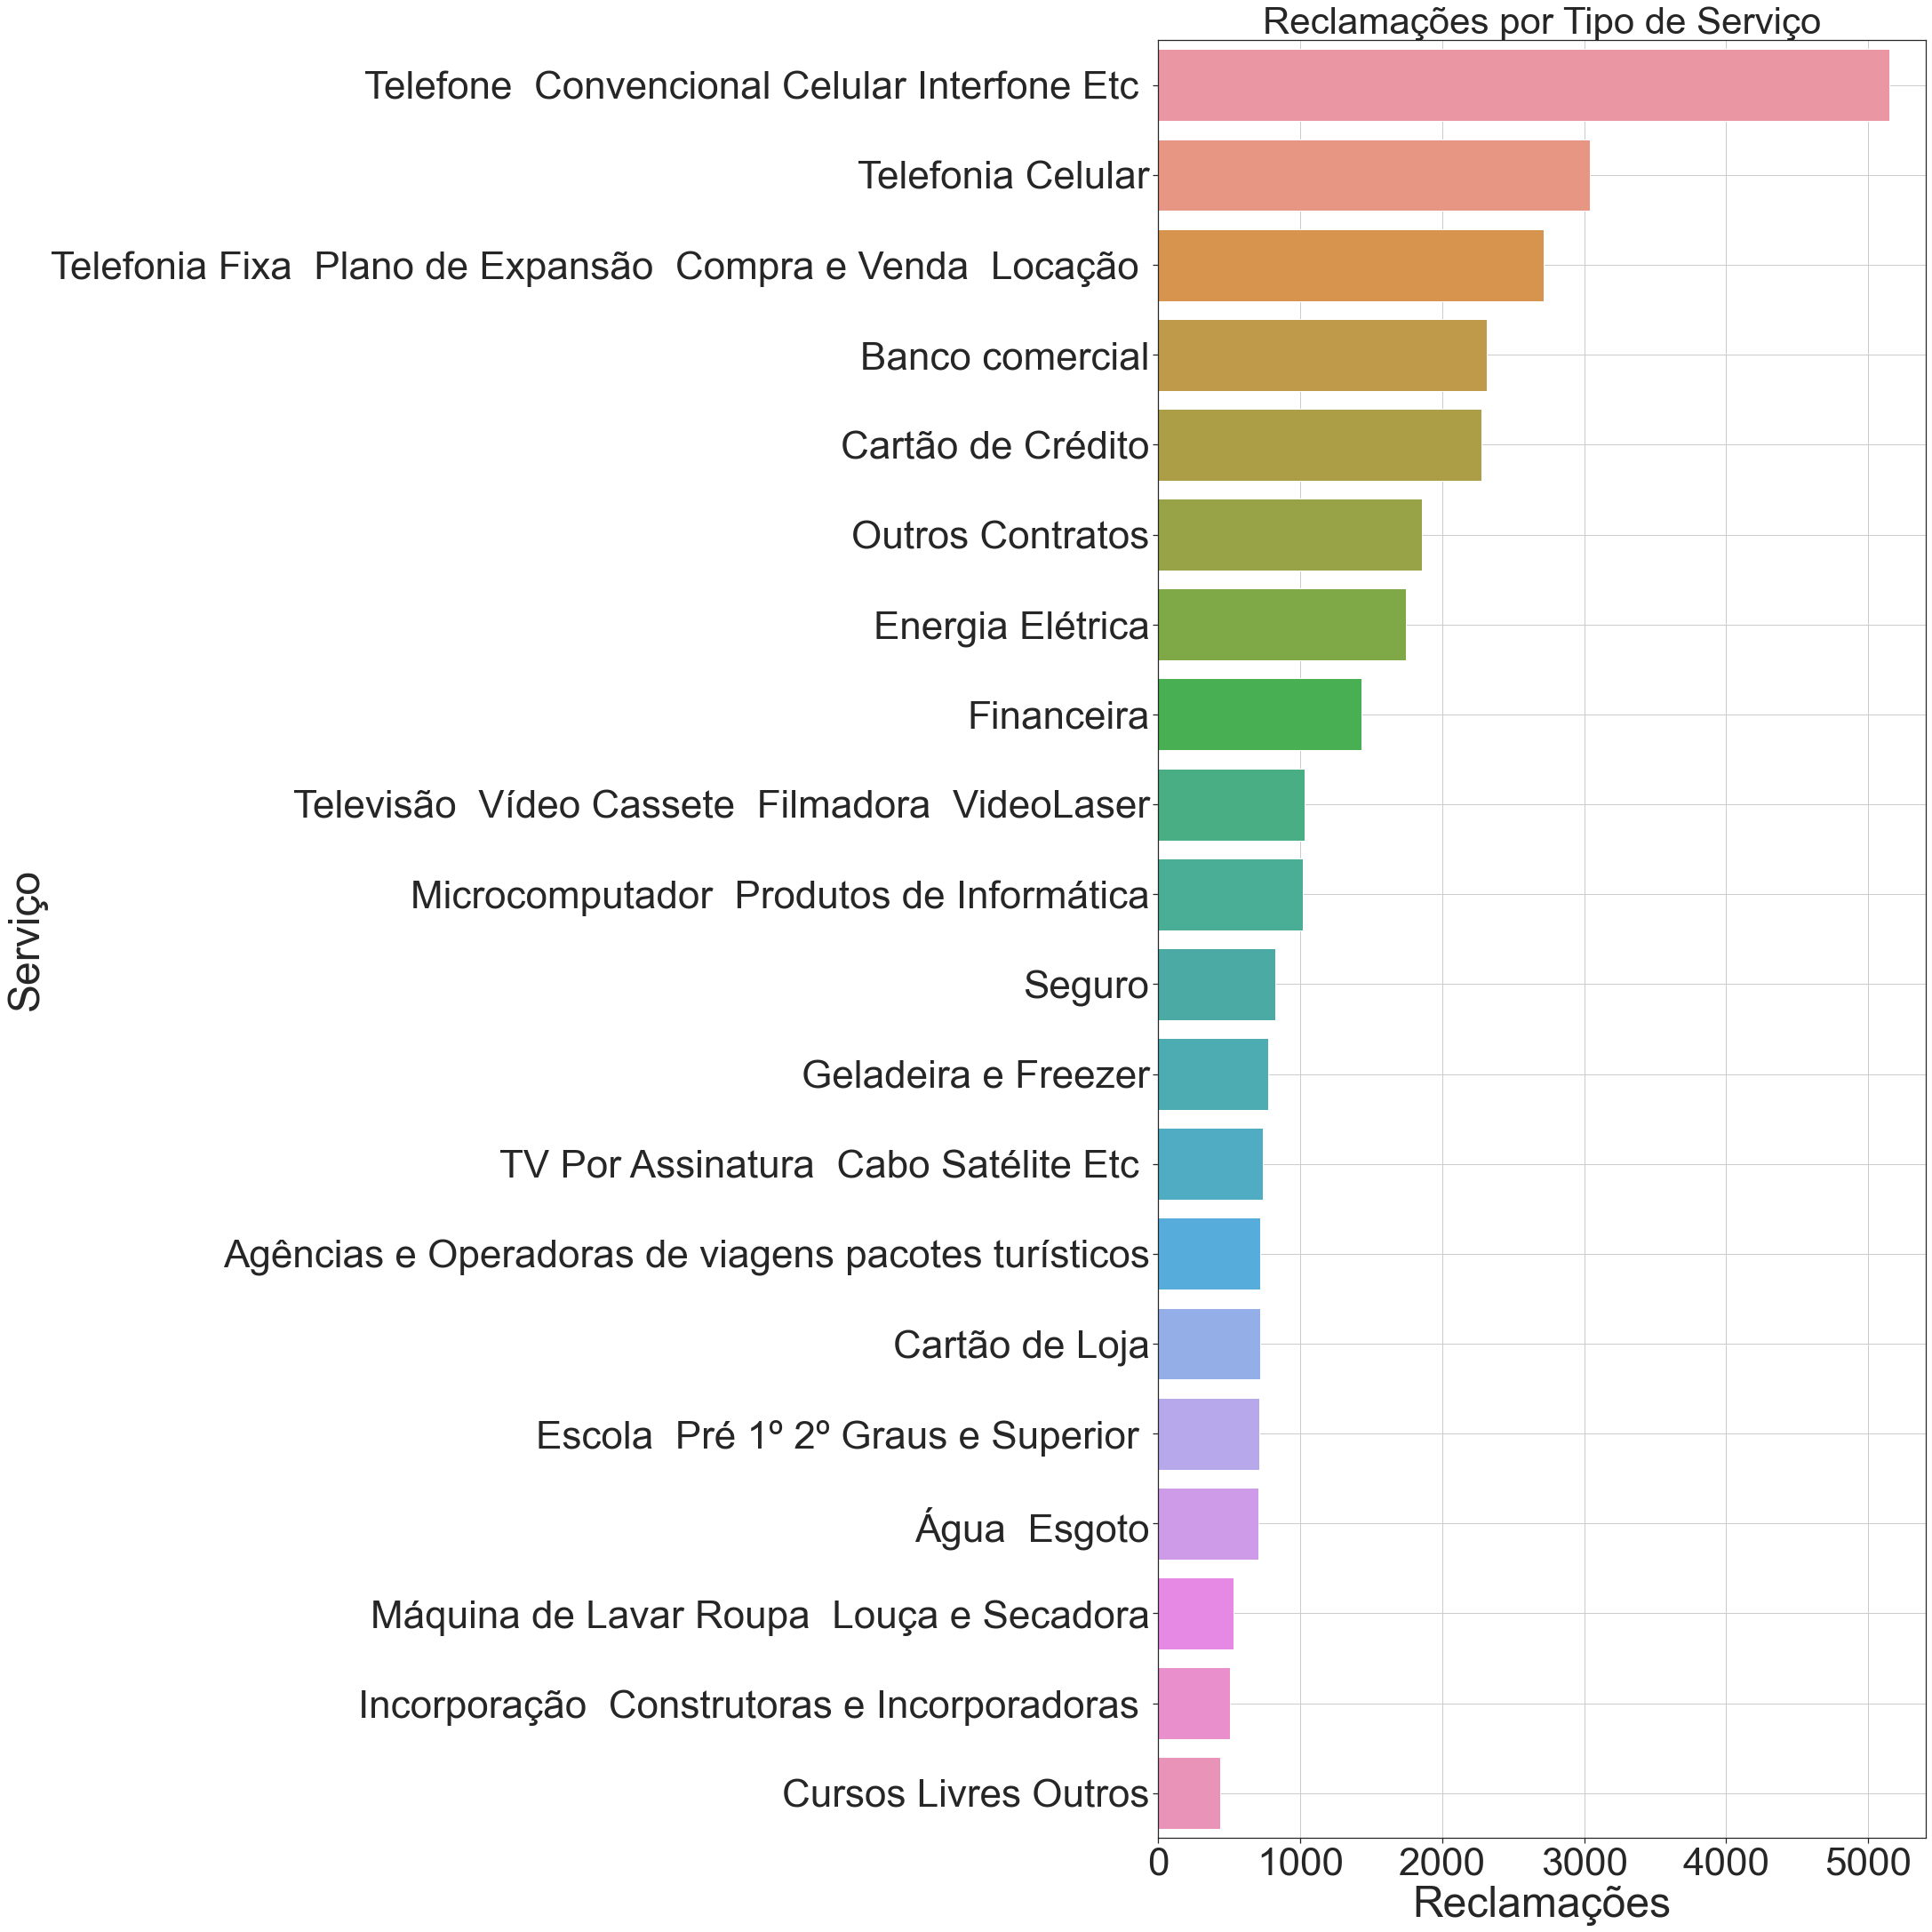

In [36]:
# Inicializa a figura do matplotlib
f, ax = plt.subplots(figsize=(30,30))
# Inicializa estilo do seaborn
sns.set(style="ticks",font_scale=3.5)
# carrega o dataset
sns.countplot(y = "Serviço", data=df_serviço,
              order = df_serviço["Serviço"].value_counts().index[:20])
ax.grid(True)
ax.set_title("Reclamações por Tipo de Serviço")
ax.set_ylabel('Serviço')
ax.set_xlabel('Reclamações')
plt.tight_layout(pad=0)
plt.savefig("Serviço_barplot.png")
plt.show()

# <font color = red> Quais são as EMPRESAS com maior incidência de insatisfação (reclamações) referentes a serviços de diversos setores, também a nível nacional.

In [37]:
'''Separação da coluna das empresas do DataFrame principal, para poder criar a nuvem específica.'''

df_empresa = pd.DataFrame()
df_empresa['Empresa'] = data['Empresa']

In [38]:
df_empresa.isnull().sum()

Empresa    1
dtype: int64

In [39]:
df_empresa.dropna(inplace=True)
df_empresa.isnull().sum()

Empresa    0
dtype: int64

In [40]:
'''Criação de um dicionário com as substituições necessárias à construção da nuvem.'''

dicionario = {' ':' ','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_empresa["Empresa"] = df_empresa.replace({'Empresa': dicionario},regex=True)

In [41]:
XXX = (df_empresa.groupby("Empresa").size().sort_values(ascending=False))
XXX

Empresa
TELEFONICA BRASIL SA                                  1150
CLARO SA                                              1125
TIM CELULAR SA                                         786
VIA VAREJO SA                                          516
ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO      480
                                                      ... 
MAS COBRANÇA E REESTRUTURAÇAO DE ATIVOS FINANCEIRO       1
MAS INFORMATICA LTDA  CONTATO INFORMÁTICA                1
MAS INFORMATICA LTDA  ME                                 1
MASIMA INCORPORAÇÕES & EMPREEDIMENTOS LTDA               1
123 VIAGEM DE TURISMO LTDA                               1
Length: 10607, dtype: int64

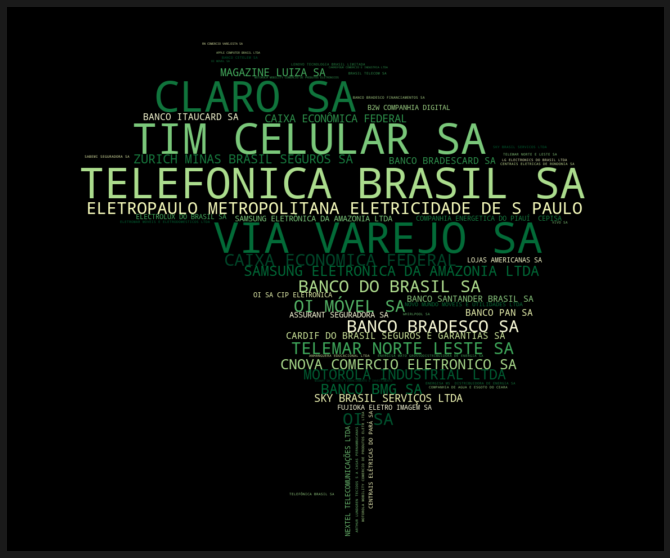

In [42]:
# endereço LOCAL da SUA imagem
estado_mask = np.array(Image.open("Brasil.jpg"))


wordcloud_empresas = WordCloud(background_color="black",collocations=False,
                              colormap="YlGn",
                              width = 1600,
                              height = 800,
                              max_font_size=1000,
                              max_words=60,relative_scaling=0,
                              mask=estado_mask
                             ).generate_from_frequencies(XXX)
plt.figure(figsize = (20,10),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.savefig("Empresa_wordcloud.png")
plt.show()

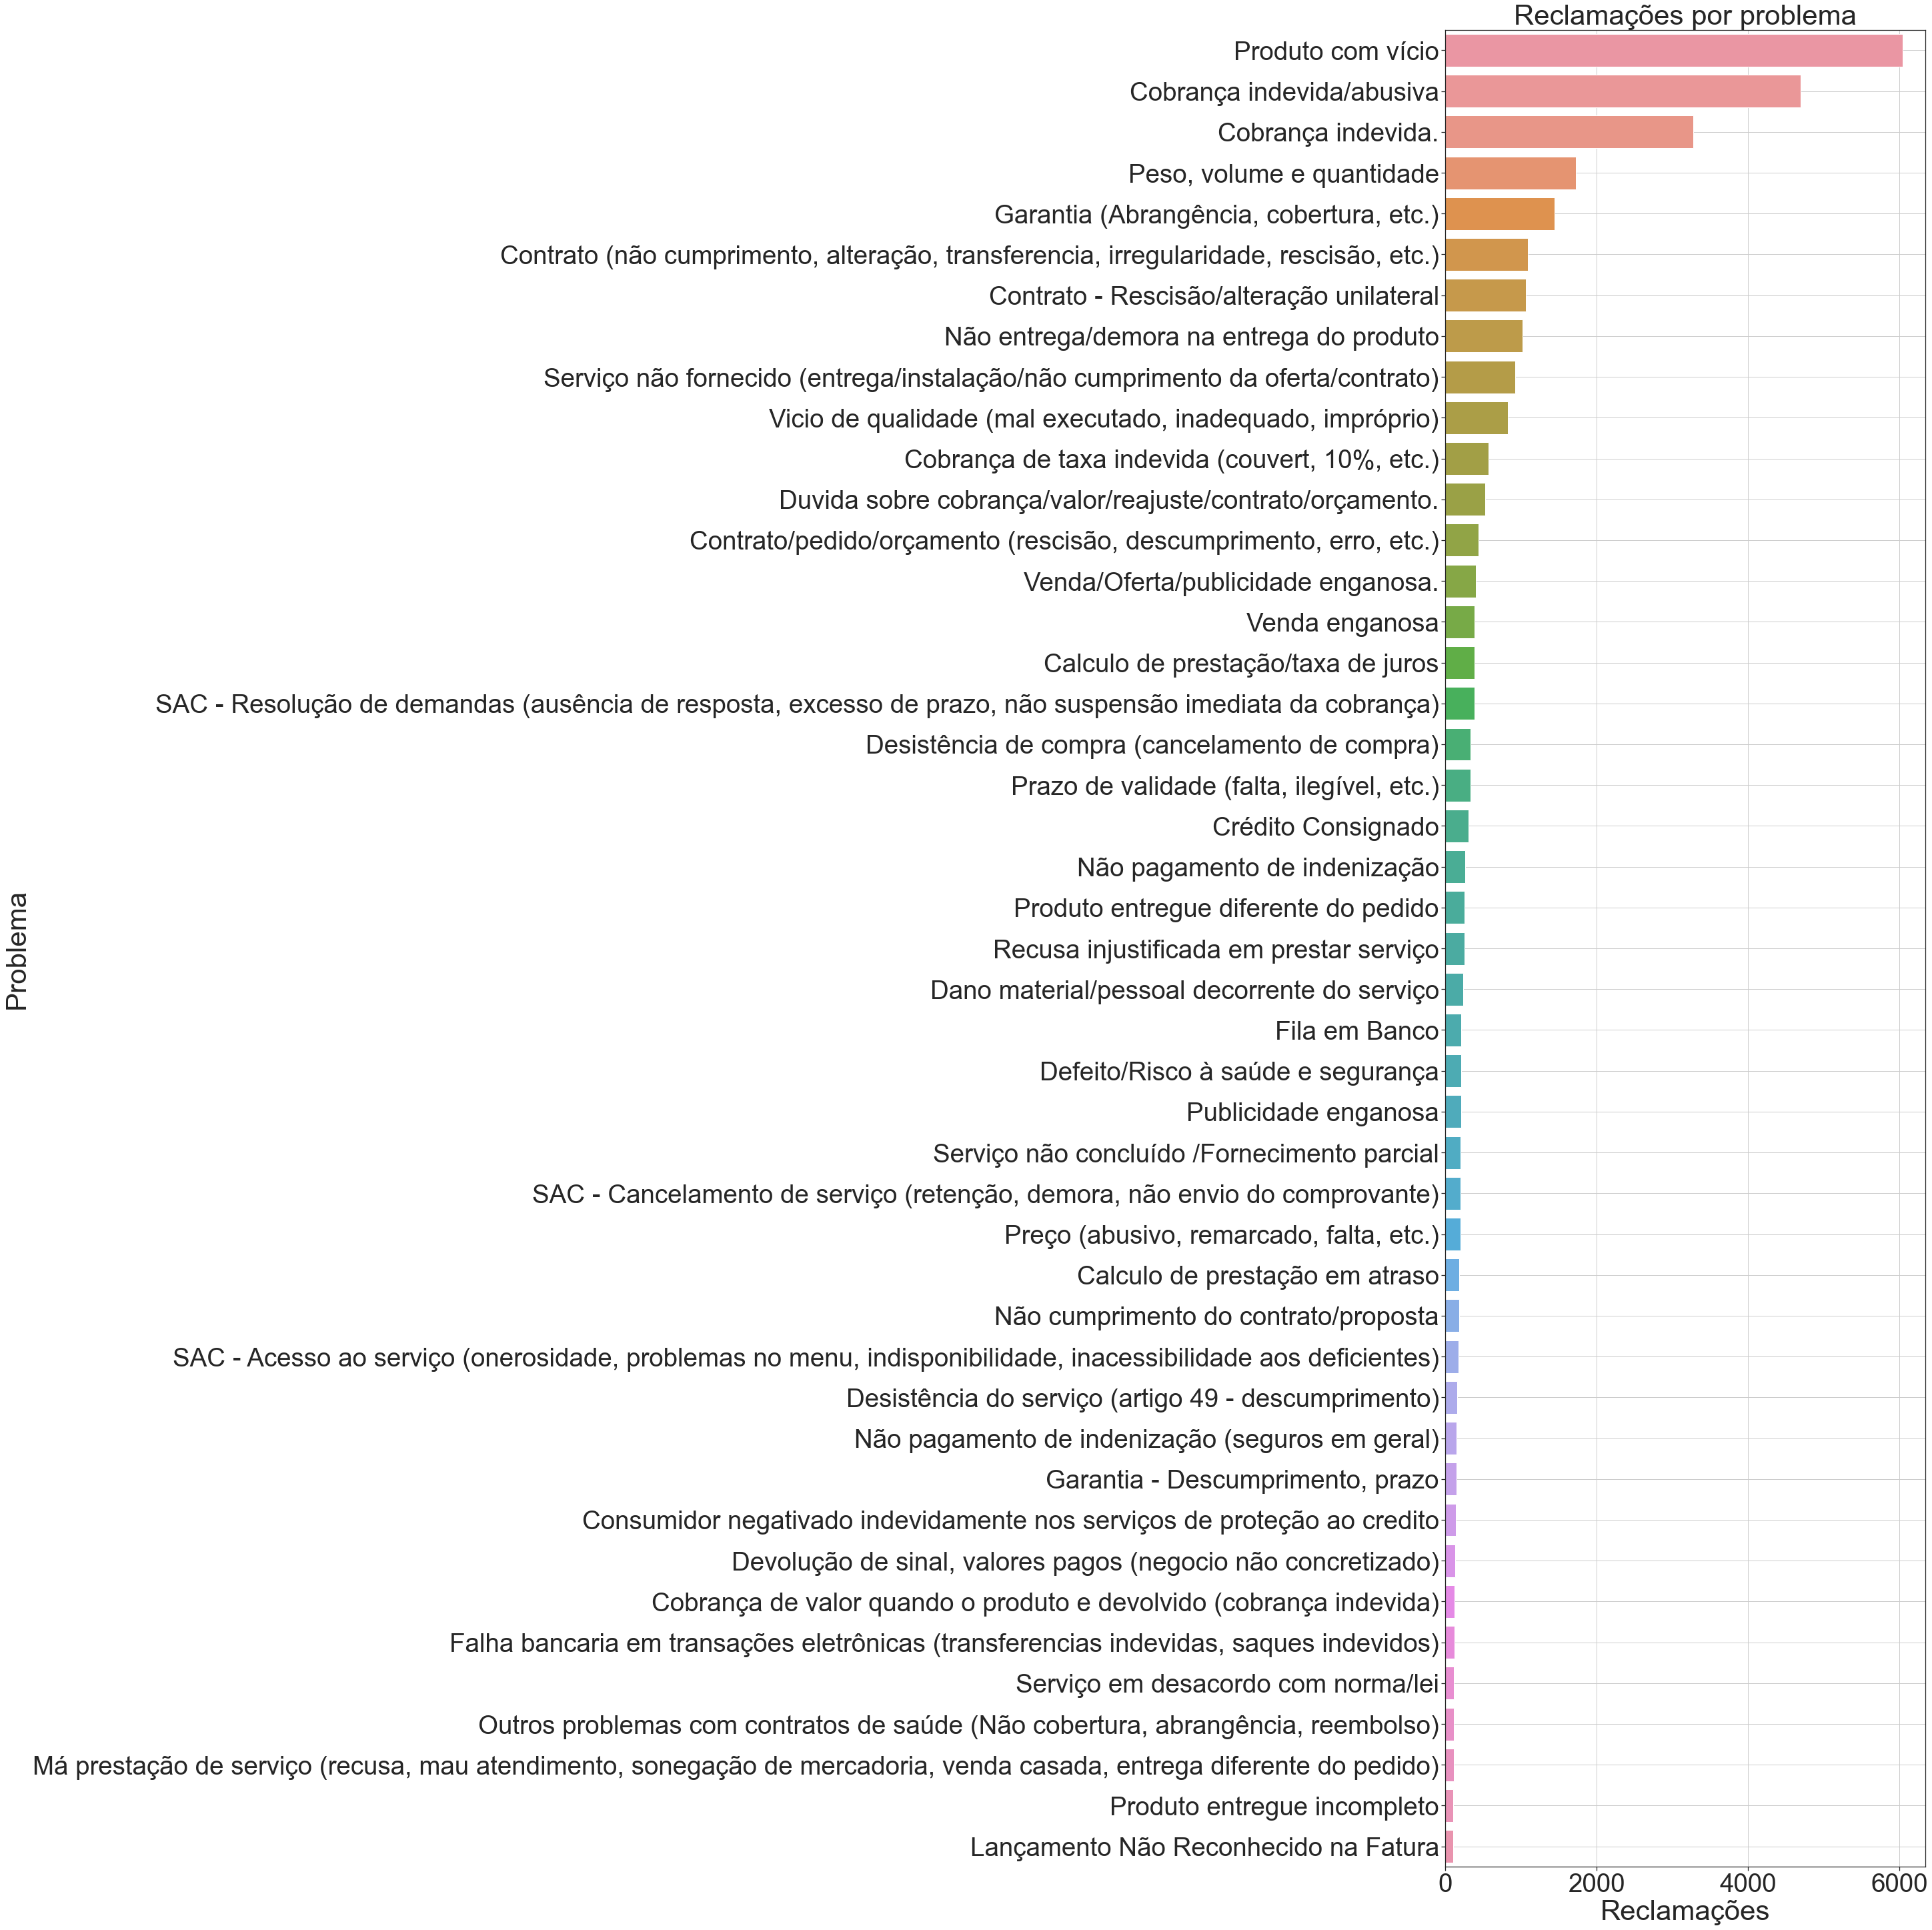

In [43]:
df_problema = pd.DataFrame()
df_problema['Problema'] = data['Problema']

# Inicializa a figura do matplotlib
f, ax = plt.subplots(figsize=(40,40))
# Inicializa estilo do seaborn
sns.set(style="ticks",font_scale=3.5)
# carrega o dataset
sns.countplot(y = "Problema", data=df_problema,
              order = df_problema["Problema"].value_counts().index[:45])
ax.grid(True)
ax.set_title("Reclamações por problema")
ax.set_ylabel('Problema')
ax.set_xlabel('Reclamações')
plt.tight_layout(pad=0)
plt.savefig("Problema_barplot.png")
plt.show()

# EXTRA <font color = red> Quais SETORES apresentam maior incidência de insatisfação (reclamações) relacionada ao público entre 21 a 30 ANOS, referentes a serviços de bdiversos a nível nacional.

In [48]:
Setor_Idade = data[data['Faixa Etária']=='entre 21 a 30 anos']
Setor_Idade.head(1)

,Região,Estado,Empresa,Subsidiária,Setor,Serviço,Problema,Faixa Etária
5,Sudeste,São Paulo,AEROVIAS DEL CONTINENTE AMERICANO S/A,AVIANCA INTERNACIONAL,TRANSPORTE AÉREO DE PASSAGEIROS REGULAR,Agências e Operadoras de viagens (pacotes turí...,Desistência do serviço (artigo 49 - descumprim...,entre 21 a 30 anos


In [49]:
len(Setor_Idade)

7089

In [50]:
df_Setor_Idade = pd.DataFrame()
df_Setor_Idade['Setor'] = Setor_Idade['Setor']

In [51]:
df_Setor_Idade.isnull().sum()

Setor    1091
dtype: int64

In [52]:
df_Setor_Idade.dropna(inplace=True)
df_Setor_Idade.isnull().sum()

Setor    0
dtype: int64

In [53]:
dicionario = {' ':' ','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_Setor_Idade["Setor"] = df_Setor_Idade.replace({'Setor': dicionario},regex=True)

In [55]:
Setor = (df_Setor_Idade.groupby("Setor").size().sort_values(ascending=False))
Setor

Setor
COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉSTICOS E EQUIPAMENTOS DE ÁUDIO E VÍDEO        353
BANCOS MÚLTIPLOS COM CARTEIRA COMERCIAL                                                     326
SERVIÇOS DE TELEFONIA FIXA COMUTADA  STFC                                                   298
TELEFONIA MÓVEL CELULAR                                                                     295
COMÉRCIO ATACADISTA DE COMPONENTES ELETRÔNICOS E EQUIPAMENTOS DE TELEFONIA E COMUNICAÇÃO    211
                                                                                           ... 
COMÉRCIO VAREJISTA DE ARTIGOS DE PAPELARIA                                                    1
COMÉRCIO VAREJISTA DE ARTIGOS DE RELOJOARIA                                                   1
ESTACIONAMENTO DE VEÍCULOS                                                                    1
PRODUÇÃO DE ARTEFATOS ESTAMPADOS DE METAL                                                     1
COMÉRCIO ATACADISTA DE MADEIRA E P

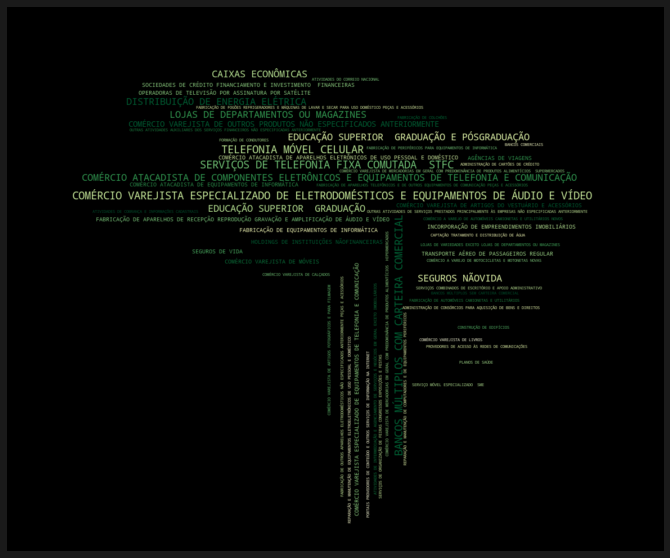

In [56]:
estado_mask = np.array(Image.open("Brasil.jpg"))


wordcloud_empresas = WordCloud(background_color="black",collocations=False,
                              colormap="YlGn",
                              width = 1600,
                              height = 800,
                              max_font_size=1000,
                              max_words=60,relative_scaling=0,
                              mask=estado_mask
                             ).generate_from_frequencies(Setor)
plt.figure(figsize = (20,10),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.savefig("Empresa_wordcloud.png")
plt.show()

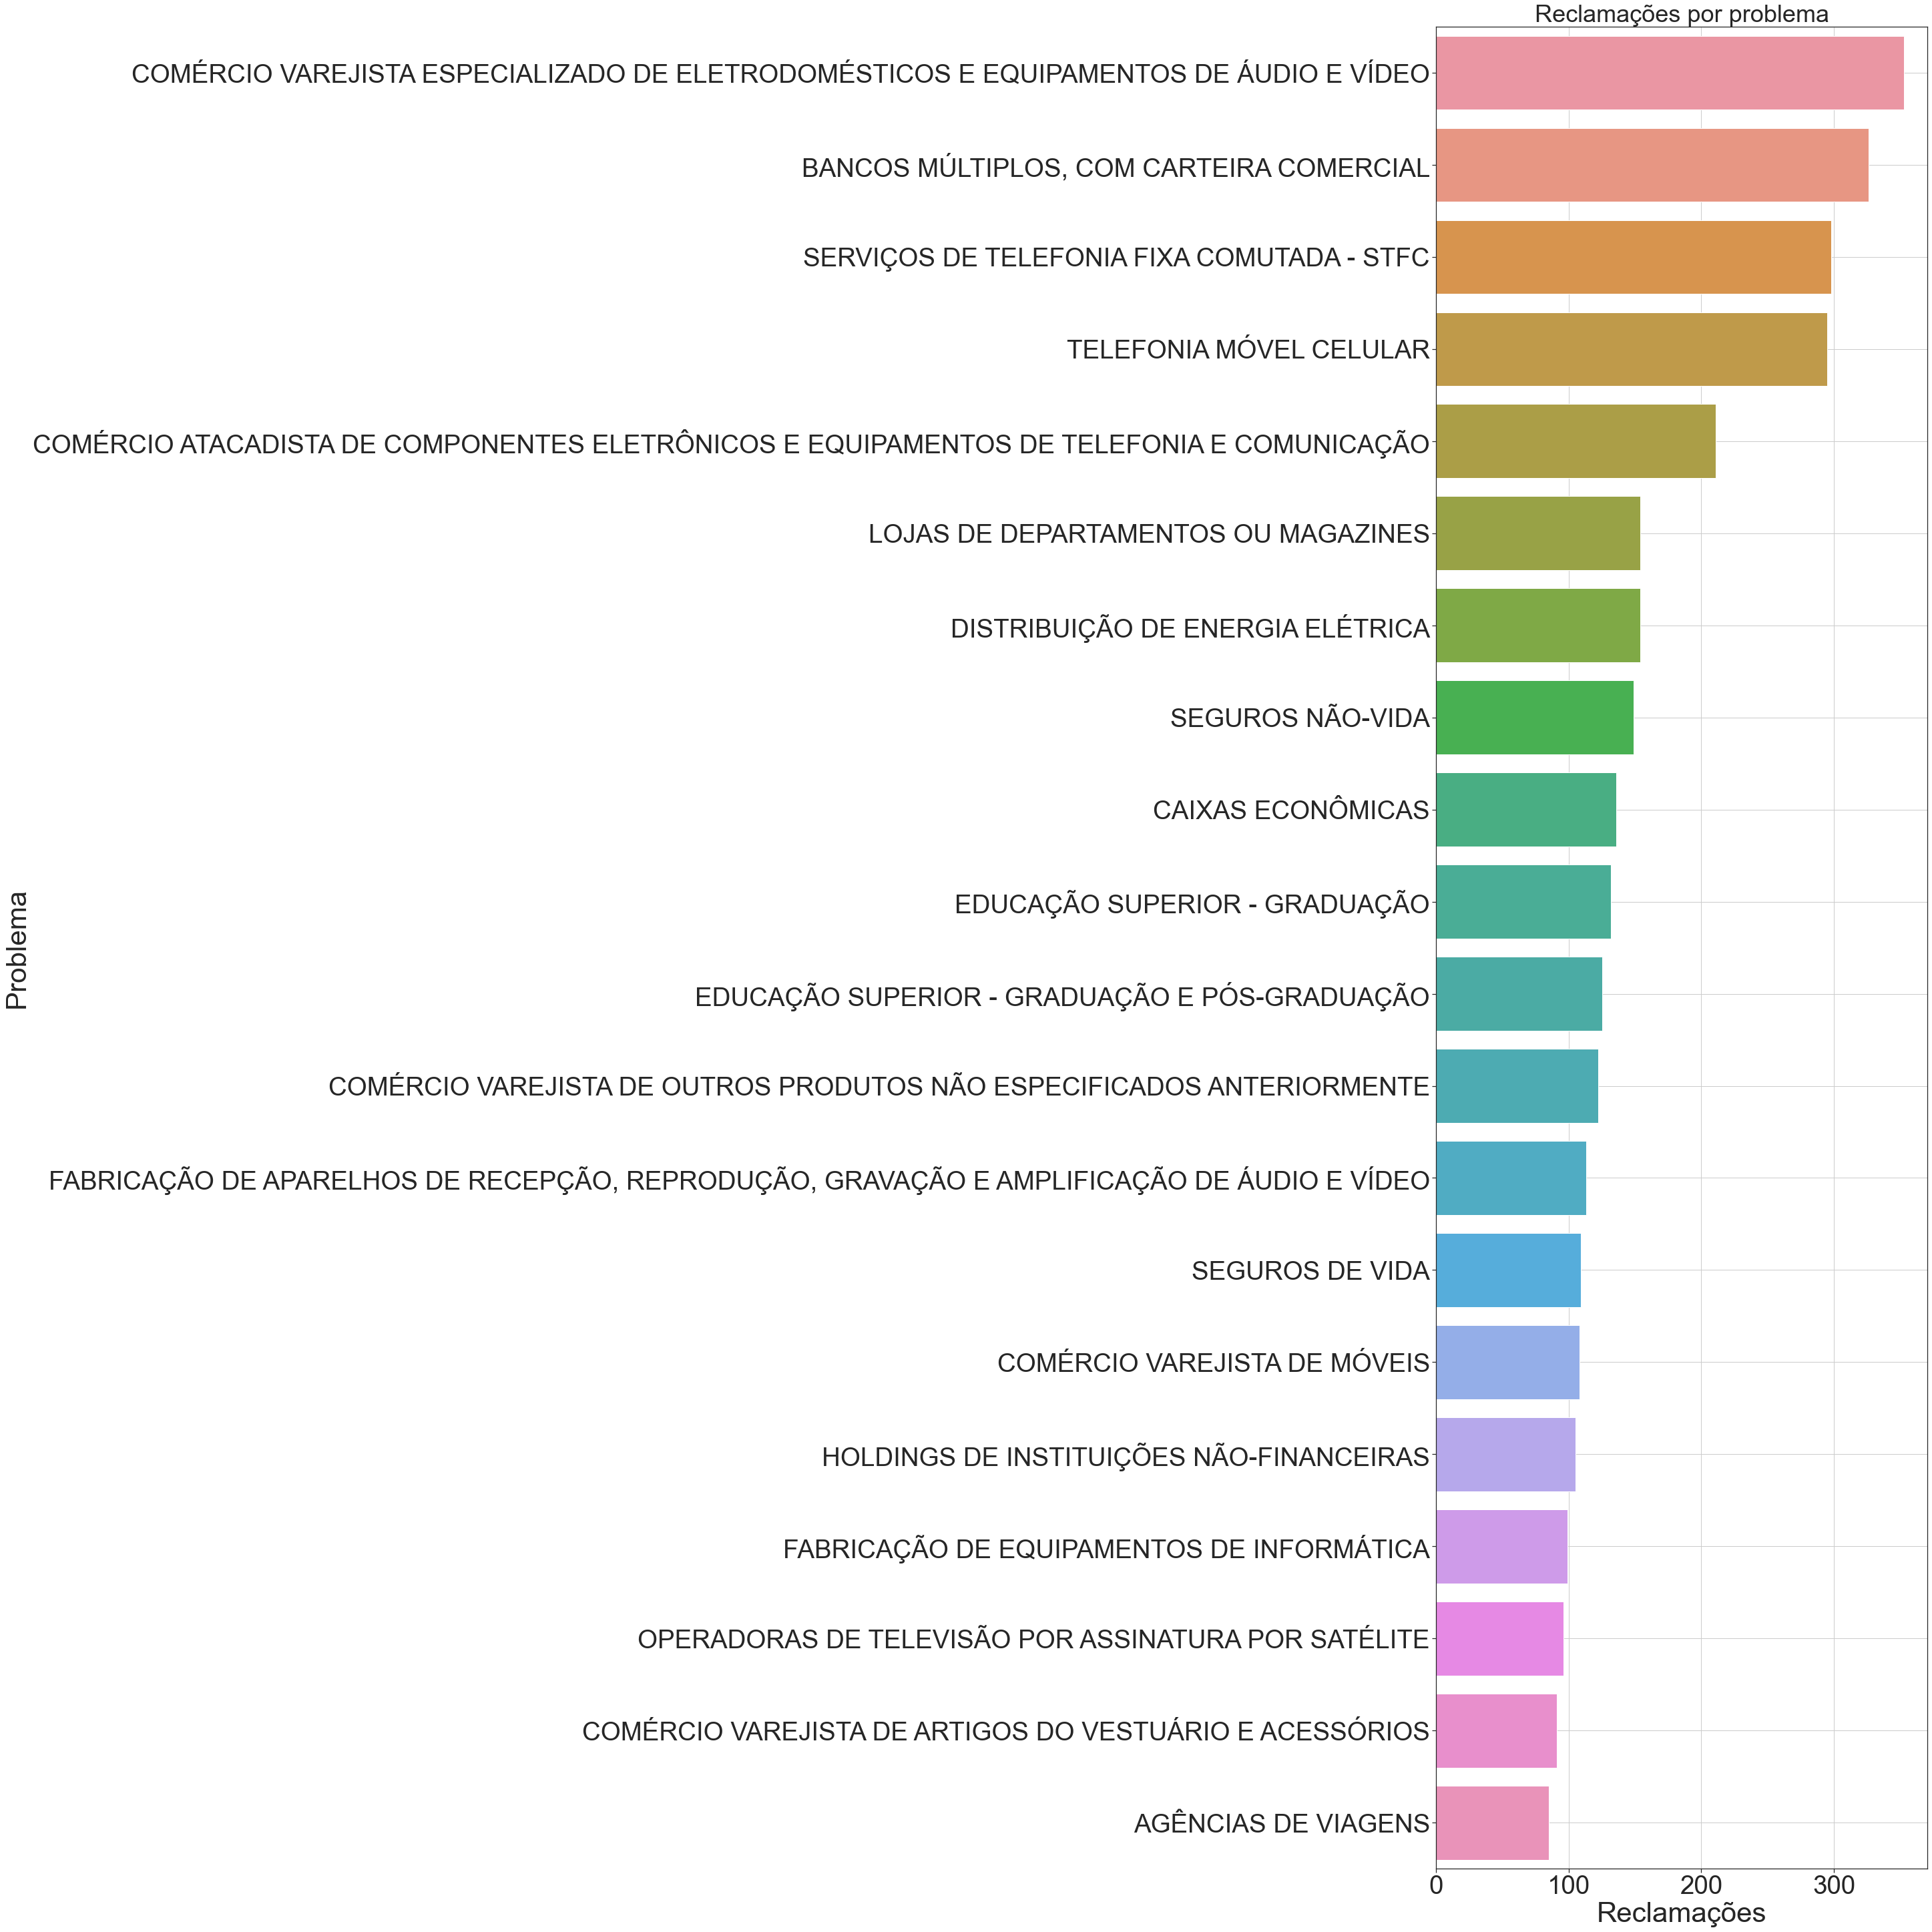

In [65]:
# Inicializa a figura do matplotlib
f, ax = plt.subplots(figsize=(40,40))
# Inicializa estilo do seaborn
sns.set(style="ticks",font_scale=3.0)
# carrega o dataset
sns.countplot(y = "Setor", data=Setor_Idade,
              order = Setor_Idade["Setor"].value_counts().index[:20])
ax.grid(True)
ax.set_title("Reclamações por problema")
ax.set_ylabel('Problema')
ax.set_xlabel('Reclamações')
plt.tight_layout(pad=0)
plt.savefig("Problema_barplot.png")
plt.show()